# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


C:\Users\Bandit\AppData\Local\Temp\ipykernel_24920\2733553708.py:12: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data.csv")
C:\Users\Bandit\AppData\Local\Temp\ipykernel_24920\2733553708.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean = df_clean.apply(pd.to_numeric, errors='ignore')


<Figure size 1000x600 with 0 Axes>

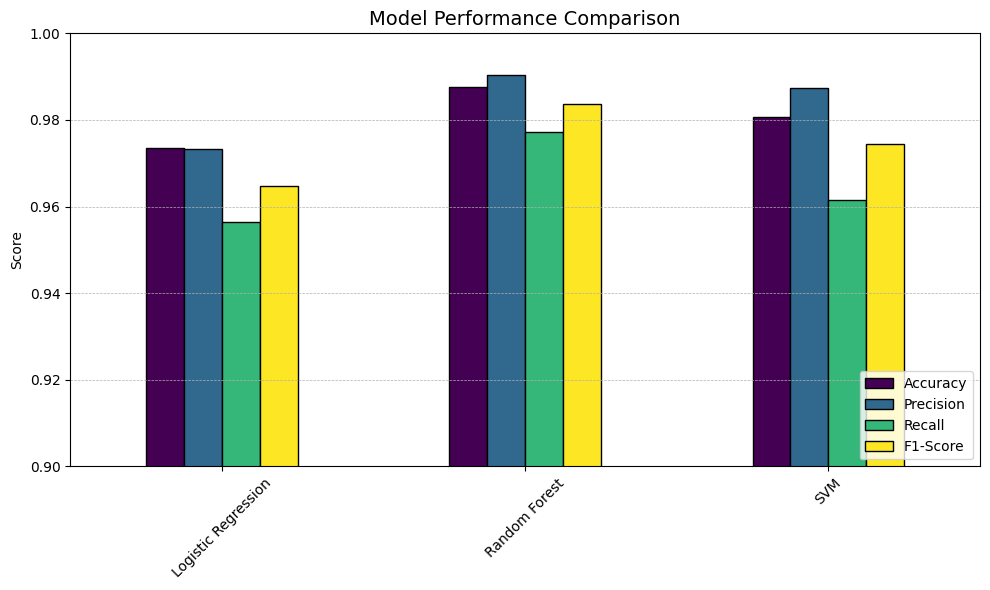


Confusion Matrix for Logistic Regression:
[[1833   30]
 [  50 1095]]

Confusion Matrix for Random Forest:
[[1852   11]
 [  26 1119]]

Confusion Matrix for SVM:
[[1849   14]
 [  44 1101]]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("Data.csv")

# --- Data Preprocessing ---
df_clean = df.copy()

# Handle mixed-type columns
df_clean = df_clean.apply(pd.to_numeric, errors='ignore')

# Encode the target column
le = LabelEncoder()
df_clean['class'] = le.fit_transform(df_clean['class'])

# Drop non-numeric columns (except target)
non_numeric_cols = df_clean.select_dtypes(include='object').columns
df_clean = df_clean.drop(columns=non_numeric_cols)

# Fill missing values
df_clean = df_clean.fillna(0)

# Split features and target
X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Model Development ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# --- Model Comparison (Plotting) ---
# Prepare data for plotting
metrics_df = pd.DataFrame({model: {k: v for k, v in scores.items() if k != "Confusion Matrix"} for model, scores in results.items()})
metrics_df = metrics_df.T  # Transpose for plotting

# Create a performance comparison plot
plt.figure(figsize=(10, 6))
ax = metrics_df.plot(
    kind='bar',
    colormap='viridis',
    figsize=(10, 6),
    edgecolor='black'
)
plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Score')
plt.ylim(0.90, 1.00)  # Zoom into 0.90–1.00 to highlight differences
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

# Optional: Display confusion matrices
for model_name, scores in results.items():
    print(f"\nConfusion Matrix for {model_name}:\n{scores['Confusion Matrix']}")


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.